In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

## <font color=#00b3e5> Q1. Read the dataset

In [123]:
data=pd.read_csv('Churn_Modelling.csv')

##### Print the data types of all the fields

In [124]:
DT=data.dtypes.to_frame(name='Datatypes')
DT.reset_index(level=None, drop=False, inplace=True)
DT.rename(columns ={'index':'Columns'},inplace=True)
DT

,Columns,Datatypes
0,RowNumber,int64
1,CustomerId,int64
2,Surname,object
3,CreditScore,int64
4,Geography,object
5,Gender,object
6,Age,int64
7,Tenure,int64
8,Balance,float64
9,NumOfProducts,int64


##### Check for any incorrect values for the object datatypes

In [125]:
for col in data.columns[data.dtypes == 'object']:  
    temp= pd.DataFrame(data[col].str.isdigit())
    temp= pd.DataFrame(data[col].str.contains('[\?*&^%$#@!]')== True)
    res = (temp[col].values == True).sum()
    ans=''
    if res>0:
        print("\033[1m" + "The column",col,",has the following exceptions:"  + "\033[0m" )
        print(data.loc[data[col].astype(str).str.contains('[\?*&^%$#@!]') == True][col])
        


The column Surname ,has the following exceptions:
9         H?
329       L?
437      Hs?
941     Y?an
970       L?
        ... 
9633      K?
9704      L?
9792      Y?
9857      K?
9910      L?
Name: Surname, Length: 92, dtype: object


In [126]:
data['Surname'].value_counts().head(15)

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
Genovese    25
Yeh         25
Shih        25
Maclean     24
Wright      24
White       23
Wilson      23
Fanucci     23
Ma          23
Chu         22
Name: Surname, dtype: int64

##### I am not going to use Surname column in the classification model as it doesn't contribue to large groupings (Inferred from the number of distincts in each unique value group for the column Surname)

##### Checking for any Missing Values (NaN)

In [29]:
for col in data.columns:
    print(col,sum(data[col].isna()))

RowNumber 0
CustomerId 0
Surname 0
CreditScore 0
Geography 0
Gender 0
Age 0
Tenure 0
Balance 0
NumOfProducts 0
HasCrCard 0
IsActiveMember 0
EstimatedSalary 0
Exited 0


## <font color=#00b3e5> Q2.Drop the columns which are unique for all users like IDs (2.5 points)

##### Removing RowNumber , CustomerId and Surname by slicing the dataset 

## <font color=#00b3e5> Q3. Distinguish the feature and target set (2.5 points)

In [132]:
X=data.iloc[:,3:13] #Features
y=data.iloc[:,-1]   #Target

In [133]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


##### Convert categorical variable into dummy/indicator variables

In [134]:
X = pd.get_dummies(X,columns=['Geography','Gender'])
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


## <font color=#00b3e5> Q4. Divide the data set into training and test sets ( 2.5 points)

In [136]:
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=0.1, random_state=0)

## <font color=#00b3e5> Q5. Normalize the train and test data (5 points)

##### Normalizing the data before building a Neural network is important as the subsequent layers can get both positive and negative values , hence contributing to the learning more efficiently. In addition to this, scaling of the inputs on a similar level is important pre-processing step.

In [181]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

##### Note: Only fit_transform() is used on the train data for the scaling the train data. However, we only use transform() on the test data because the scaling paramaters learnt on the train data is now used to scale the test data 

## <font color=#00b3e5> Q6. Initialize & build the model. [ Make sure that you add 2 to 5 hidden dense layers in this model ] (10 points)

In [182]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

##### I am using TF Sequential classifier. 
##### RelU used in all hidden layer and inpur layer: The ReLU function is a non-linear  function that  does not activate all the neurons at the same time. The purpose of the activation function is to introduce non-linearity into the network.
##### For final output layer of the classification model, I am using the Sigmoid function

In [190]:
classifier=Sequential()
classifier.add(Dense(20,activation='relu',input_dim=X_train_std.shape[1]))
classifier.add(Dense(12, activation='relu'))
classifier.add(Dense(10, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

##### Epochs: Cycle of dataset moving forward and backward

##### After trying few combination of Epochs, Batch Size and Learning Rate, I have concluded the below parameters for this model. For more complex model, optimization techniques such as Keras Tuner can be implemented.
##### SInce the Target variable is a binary output, hence I am using "binary_crossentropy" loss function. For multi class classification, categorical_crossentropy is used.

In [212]:
opt = optimizers.adam(lr=0.0008)
classifier.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
                   
history=classifier.fit(X_train_std, y_train,epochs=100, batch_size=1000, verbose=1)

Epoch 1/100
9000/9000 [==============================] - ETA: 0s - loss: 0.2777 - accuracy: 0.89 - 0s 13us/step - loss: 0.2988 - accuracy: 0.8789
Epoch 2/100
9000/9000 [==============================] - ETA: 0s - loss: 0.3051 - accuracy: 0.86 - 0s 2us/step - loss: 0.2982 - accuracy: 0.8801
Epoch 3/100
9000/9000 [==============================] - ETA: 0s - loss: 0.2960 - accuracy: 0.88 - 0s 2us/step - loss: 0.2978 - accuracy: 0.8794
Epoch 4/100
9000/9000 [==============================] - ETA: 0s - loss: 0.3030 - accuracy: 0.88 - 0s 2us/step - loss: 0.2975 - accuracy: 0.8796
Epoch 5/100
9000/9000 [==============================] - ETA: 0s - loss: 0.3081 - accuracy: 0.87 - 0s 2us/step - loss: 0.2977 - accuracy: 0.8798
Epoch 6/100
9000/9000 [==============================] - ETA: 0s - loss: 0.3102 - accuracy: 0.88 - 0s 2us/step - loss: 0.2976 - accuracy: 0.8797
Epoch 7/100
9000/9000 [==============================] - ETA: 0s - loss: 0.2995 - accuracy: 0.88 - 0s 2us/step - loss: 0.2975 - a

9000/9000 [==============================] - ETA: 0s - loss: 0.2739 - accuracy: 0.89 - 0s 2us/step - loss: 0.2961 - accuracy: 0.8808
Epoch 58/100
9000/9000 [==============================] - ETA: 0s - loss: 0.3144 - accuracy: 0.87 - 0s 2us/step - loss: 0.2964 - accuracy: 0.8799
Epoch 59/100
9000/9000 [==============================] - ETA: 0s - loss: 0.2944 - accuracy: 0.88 - 0s 2us/step - loss: 0.2958 - accuracy: 0.8807
Epoch 60/100
9000/9000 [==============================] - ETA: 0s - loss: 0.3115 - accuracy: 0.86 - 0s 2us/step - loss: 0.2958 - accuracy: 0.8803
Epoch 61/100
9000/9000 [==============================] - ETA: 0s - loss: 0.2771 - accuracy: 0.89 - 0s 2us/step - loss: 0.2959 - accuracy: 0.8803
Epoch 62/100
9000/9000 [==============================] - ETA: 0s - loss: 0.2891 - accuracy: 0.88 - 0s 2us/step - loss: 0.2958 - accuracy: 0.8808
Epoch 63/100
9000/9000 [==============================] - ETA: 0s - loss: 0.2994 - accuracy: 0.87 - 0s 2us/step - loss: 0.2958 - accuracy

## <font color=#00b3e5> Q7. Predict the results (5 points)

In [213]:
loss, acc = classifier.evaluate(X_train_std, y_train, verbose=0)
print('Train Accuracy: %.3f' % acc)

Train Accuracy: 0.881


In [214]:
y_pred = np.round(classifier.predict(X_test_std))


##### Since this is a binary classification problem, I am not calculating probabilities of the output, rather using predict directly to identify the most possible class out of two.

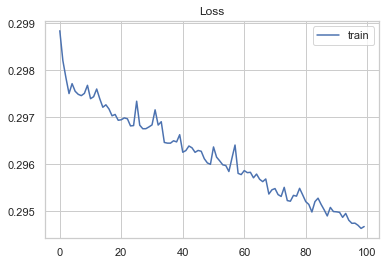

In [219]:
%matplotlib inline
from matplotlib import pyplot
from numpy import where

# plot loss during training

pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()

##### The above plot shows the Loss reduction graph

## <font color=#00b3e5> Q8. Print the Accuracy score and confusion matrix (2.5 points)

In [216]:
loss, acc = classifier.evaluate(X_test_std, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.849


In [217]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[754  40]
 [111  95]]


In [218]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       794
           1       0.70      0.46      0.56       206

    accuracy                           0.85      1000
   macro avg       0.79      0.71      0.73      1000
weighted avg       0.84      0.85      0.84      1000

